In [1]:
%matplotlib inline

Q_in= 31.731305,  Q_out= -2.681980,  Q_diss=-29.054324,  Q_net= -0.004999


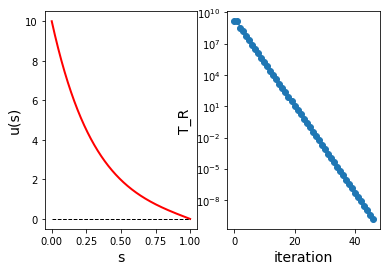

In [3]:
# %load problem06_1.py
#!/usr/bin/env python3
"""
%**************************************************************************
%*     Problem 6.1                                                        *
%*     filename: problem06_1.py                                           *
%*     program listing number: 6.4-1                                      *
%*                                                                        *
%*     This program solves one-dimensional heat equation and finds        *
%*     temperature profile and heat energy transaction using              *
%*     Numerov integration.                                               *
%*     Use function: numerov_heat(TL,delta,L,mu)                          *
%*                                                                        *
%*     Programed by Ryoichi Kawai for Computational Physics Course.       *
%*     Last modification:  10/13/2013.                                    *
%**************************************************************************i
"""
import numpy as np
import matplotlib.pyplot as plt
from numerov_heat import numerov_heat

# reset the array variables
y1=[]
y2=[]

# system parameters
mu = -10.0
TL=10.0
TR=0.0
L=1.0

# tolerance
tol=1.0e-9

# control variable 
found = False

n=0
y1.append(1.0)

[x,y] = numerov_heat(TL,y1[n],L,mu)

N=len(y)
y2.append((y[N-1]-TR)**2)
if abs(y2[n])<tol:
    found = True

if not(found):
    
# next ponit for the secant method
    n=n+1

# second guess of delta
    y1.append(y1[n-1]+0.01)

# solve ODE
    [x, y] = numerov_heat(TL,y1[n],L,mu)
    
    y2.append((y[N-1]-TR)**2)
    if abs(y2[n])<tol:
        found = True

# secant iteration
while not(found):
    
# guess delta by secant method
    y1.append(y1[n] - (y1[n]-y1[n-1])/(y2[n]-y2[n-1])*y2[n])
    
# derivative of phi(x) at the end point.
    [x, y] = numerov_heat(TL,y1[n+1],L,mu)
    y2.append((y[N-1]-TR)**2)
    if abs(y2[n])<tol:
        found = True
        
    n=n+1;

# Check energy conservation
Q_in = -(y[1]-y[0])/(x[1]-x[0])
Q_out= +(y[N-1]-y[N-2])/(x[N-1]-x[N-2])
Q_diss = mu*sum(y[0:N-3:2]+4.0*y[1:N-2:2]+y[2:N-1:2])*(x[1]-x[0])/3.0
Q_net=Q_in+Q_out+Q_diss
print("Q_in={0:10.6f},  Q_out={1:10.6f},  Q_diss={2:10.6f},  Q_net={3:10.6f}"\
.format(Q_in,Q_out,Q_diss,Q_net))

# plot heat source
plt.ioff()
plt.subplot(1,2,1)
plt.plot(x,y,color='r',linestyle='-',linewidth=2)
plt.plot([0, 1], [0, 0], color='k', linestyle='--', linewidth=1)
plt.xlabel('s',fontsize=14)
plt.ylabel('u(s)',fontsize=14)

# plot the error after each iteration.
plt.subplot(1,2,2)
plt.semilogy(np.linspace(0,n,n+1),np.abs(y2),'-o')
plt.xlabel('iteration',fontsize=14)
plt.ylabel('T_R',fontsize=14)
plt.show()